# Plots to Analyze the Baseline Training Process

In [1]:
import os

## Plot Losses

In [7]:
from plotting.plot_utils import get_logtable, set_rc_params, plot_performance_over_time, plot_performance_comparison_over_time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

In [3]:
training_losses = get_logtable(database_name="fehring_growing_nn", table_name="hpo_baseline_200_values", logtable_name="training_losses")


2024-05-06 10:10:57,349  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-05-06 10:10:57,350  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-05-06 10:10:57,351  | py-experimenter - WARNING  | No values given for keyfield saved_neural_nets
2024-05-06 10:10:57,351  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-05-06 10:10:57,351  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-05-06 10:10:57,352  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-05-06 10:10:57,352  | py-experimenter - WARNING  | No values given for keyfield seed
2024-05-06 10:10:57,353  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-05-06 10:10:57,353  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-05-06 10:10:57,354  | py-experimenter - WARNING  | No values given for keyfield total_ti

In [13]:
configurations = get_logtable(database_name="fehring_growing_nn", table_name="hpo_baseline_200_values", logtable_name="configurations")
configurations.head()

2024-05-06 10:25:19,849  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-05-06 10:25:19,851  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-05-06 10:25:19,852  | py-experimenter - WARNING  | No values given for keyfield saved_neural_nets
2024-05-06 10:25:19,852  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-05-06 10:25:19,854  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-05-06 10:25:19,854  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-05-06 10:25:19,855  | py-experimenter - WARNING  | No values given for keyfield seed
2024-05-06 10:25:19,856  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-05-06 10:25:19,857  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-05-06 10:25:19,858  | py-experimenter - WARNING  | No values given for keyfield total_ti

,ID,experiment_id,timestamp,environment_id,trial_number,worker_number,worker_seed,batch_size,clip_range,clip_range_vf,ent_coef,gae_lambda,learning_rate,max_grad_norm,n_epochs,n_steps,normalize_advantage,vf_coef,final_score,final_std
0,1,1,2024-05-03 16:52:36,MiniHack-Room-Random-5x5-v0,0,4,4,64,0.2,None,0.186169,0.95,0.000164,0.5,8,None,0,0.5,-0.589,0.794575
1,2,1,2024-05-03 16:52:41,MiniHack-Room-Random-5x5-v0,0,3,3,64,0.2,None,0.186169,0.95,0.000164,0.5,8,None,0,0.5,-0.982,0.014697
2,3,1,2024-05-03 16:53:00,MiniHack-Room-Random-5x5-v0,0,1,1,64,0.2,None,0.186169,0.95,0.000164,0.5,8,None,0,0.5,-0.981,0.015133
3,4,1,2024-05-03 16:53:00,MiniHack-Room-Random-5x5-v0,0,0,0,64,0.2,None,0.186169,0.95,0.000164,0.5,8,None,0,0.5,-0.978,0.014000
4,5,1,2024-05-03 16:53:05,MiniHack-Room-Random-5x5-v0,0,2,2,64,0.2,None,0.186169,0.95,0.000164,0.5,8,None,0,0.5,-0.976,0.012806


In [18]:
configurations[configurations["trial_number"] == 167]

,ID,experiment_id,timestamp,environment_id,trial_number,worker_number,worker_seed,batch_size,clip_range,clip_range_vf,ent_coef,gae_lambda,learning_rate,max_grad_norm,n_epochs,n_steps,normalize_advantage,vf_coef,final_score,final_std
835,836,1,2024-05-05 14:09:45,MiniHack-Room-Random-5x5-v0,167,2,2,256,0.2,None,0.106715,0.95,0.000211,0.5,11,None,0,0.5,-0.781,0.593859
836,837,1,2024-05-05 14:09:45,MiniHack-Room-Random-5x5-v0,167,0,0,256,0.2,None,0.106715,0.95,0.000211,0.5,11,None,0,0.5,-0.785,0.595168
837,838,1,2024-05-05 14:09:45,MiniHack-Room-Random-5x5-v0,167,1,1,256,0.2,None,0.106715,0.95,0.000211,0.5,11,None,0,0.5,-0.979,0.015133
838,839,1,2024-05-05 14:09:59,MiniHack-Room-Random-5x5-v0,167,4,4,256,0.2,None,0.106715,0.95,0.000211,0.5,11,None,0,0.5,-0.990,0.012649
839,840,1,2024-05-05 14:10:04,MiniHack-Room-Random-5x5-v0,167,3,3,256,0.2,None,0.106715,0.95,0.000211,0.5,11,None,0,0.5,-0.987,0.011874


In [4]:
training_losses.head()
training_losses["seed"] = training_losses["worker_number"].astype(int)

In [5]:
y_columns = ["entropy_loss", "policy_gradient_loss","value_loss", "explained_variance"]

2024-05-06 10:11:10,449  | py.warnings - WARNING  | /bigwork/nhwpfehl/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(

2024-05-06 10:11:10,989  | py.warnings - WARNING  | /bigwork/nhwpfehl/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(

2024-05-06 10:11:11,585  | py.warnings - WARNING  | /bigwork/nhwpfehl/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(

2024-05-06 10:11:12,172  | py.warnings - WARNING  | /bigwork/nhwpfehl/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(



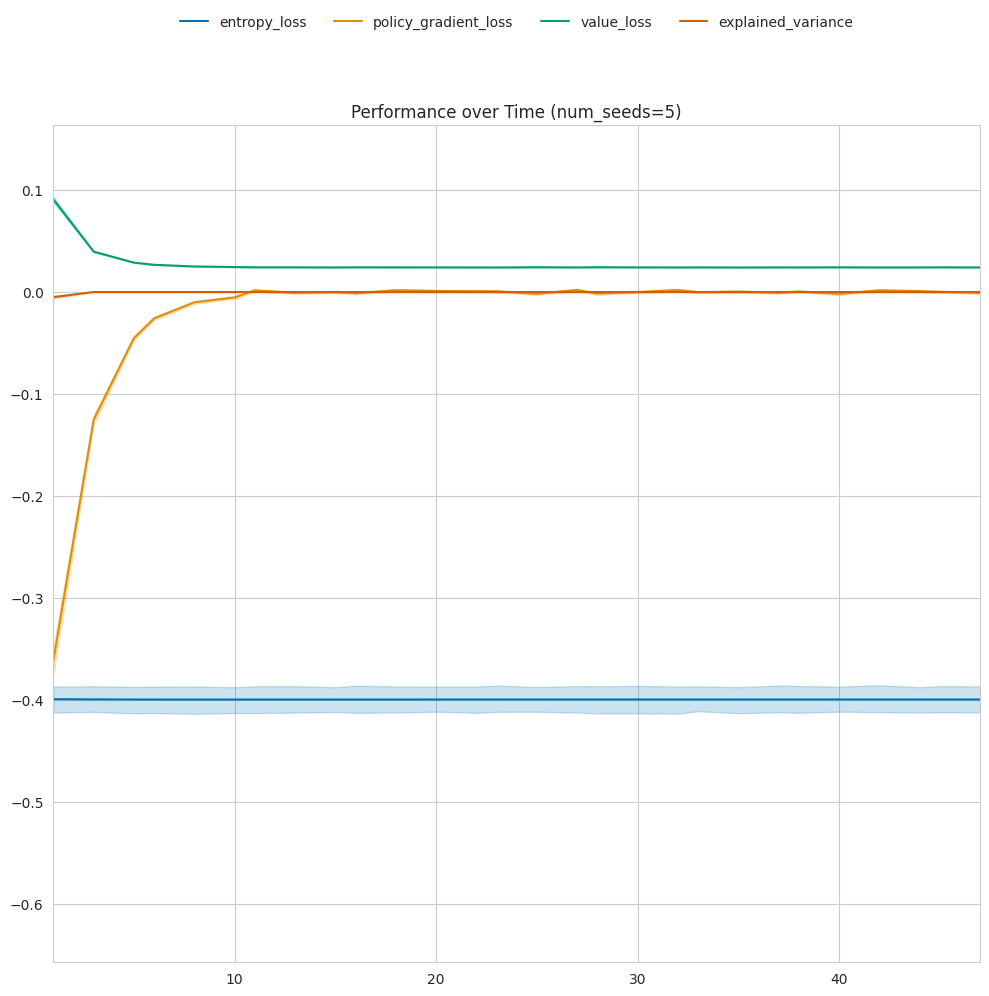

In [6]:
trial_number = 167
fig = plt.figure(figsize=(10, 10))
relevant_df = training_losses[training_losses.trial_number == trial_number]
plot_performance_comparison_over_time(training_losses, fig, x = "n_rollout", y_columns=y_columns)
plt.show()

### Plot only Entropy Loss

/home/lukas/architectures-in-rl/plotting/plot_utils.py:281: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


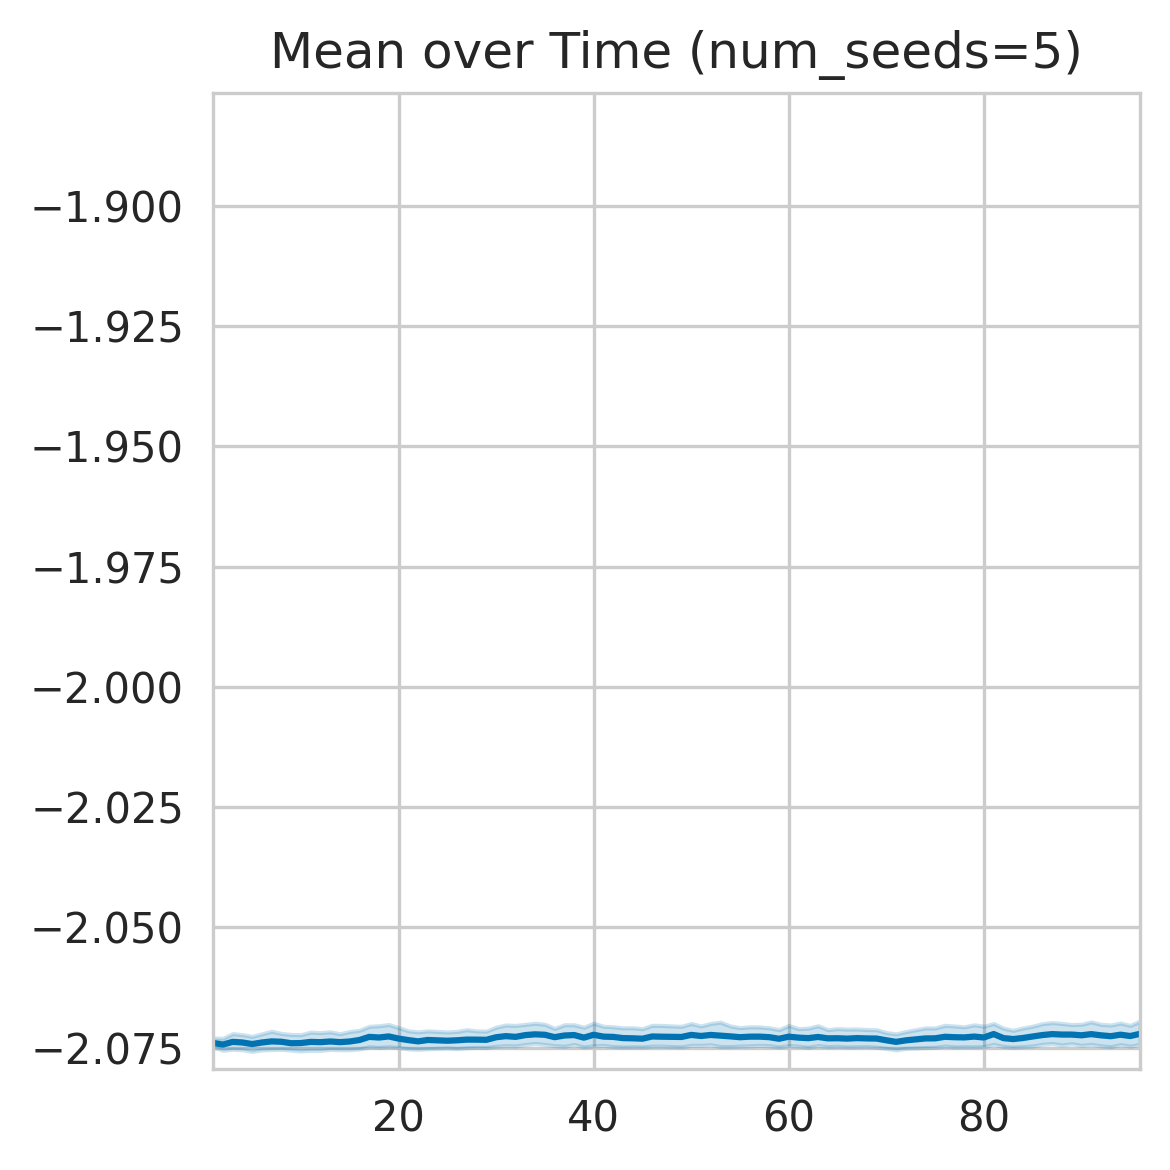

/home/lukas/architectures-in-rl/plotting/plot_utils.py:281: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


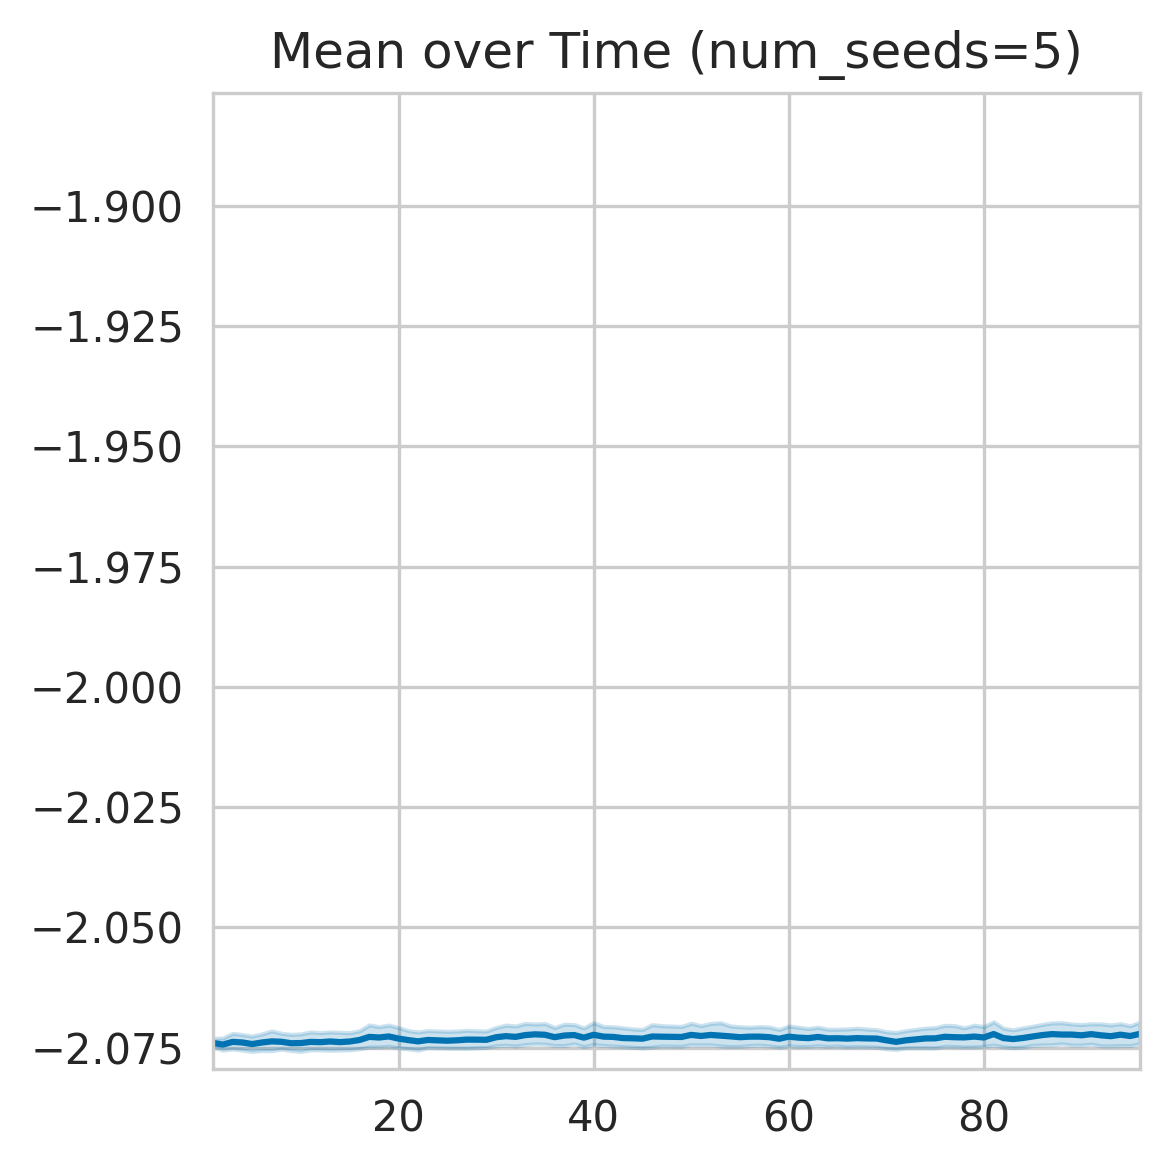

/home/lukas/architectures-in-rl/plotting/plot_utils.py:281: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


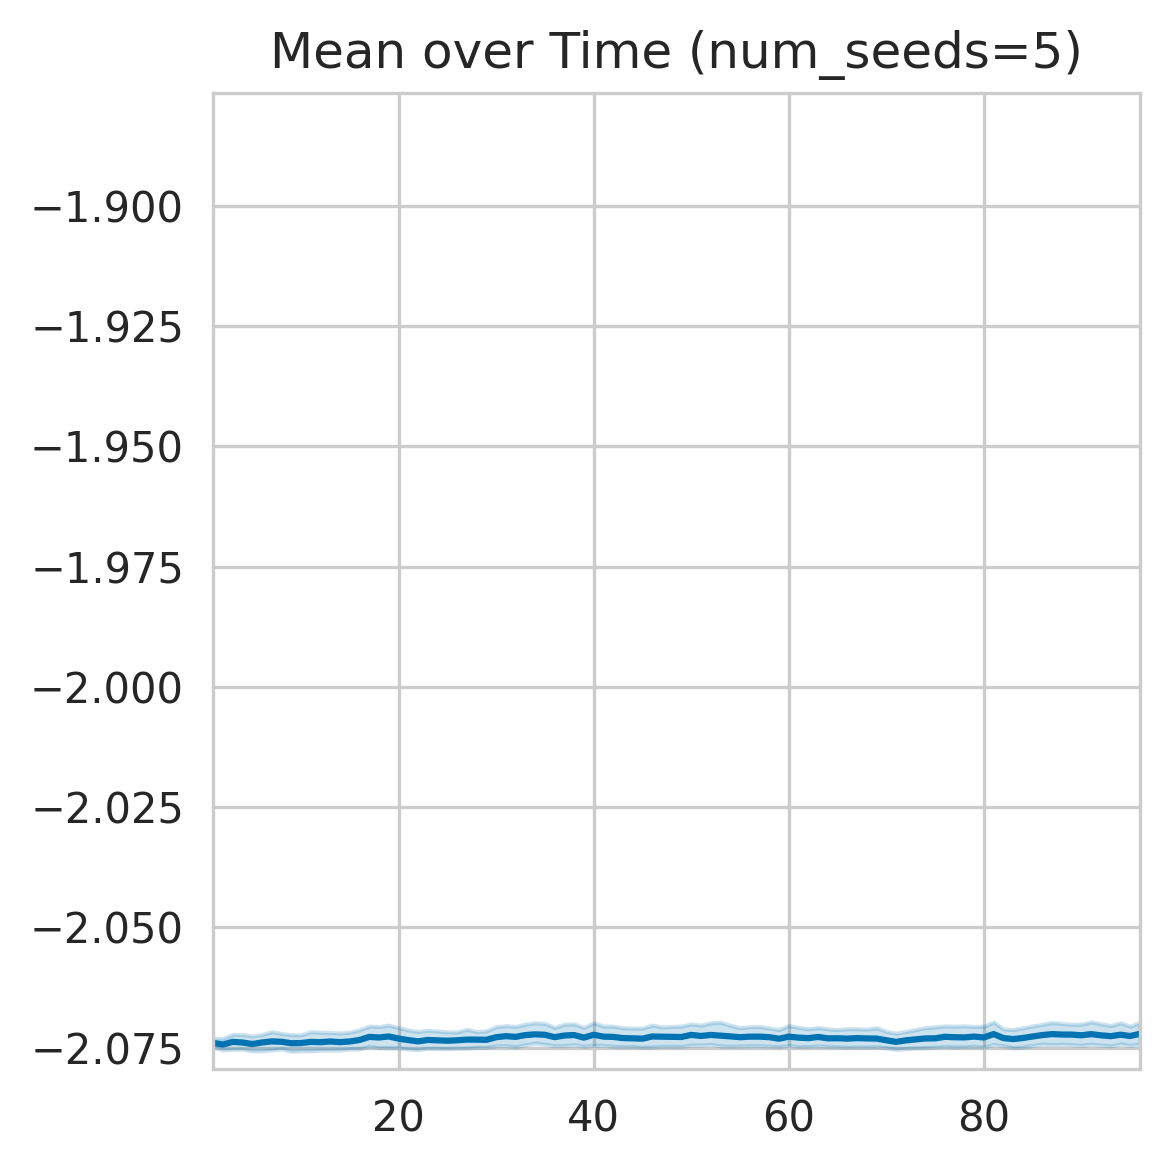

In [ ]:
y = "entropy_loss"
for trial_number in training_losses.trial_number.unique()[0:3]:
    training_losses["seed"] = training_losses["worker_number"].astype(int)
    training_losses["entropy_loss"]
    plot_performance_over_time(training_losses, x = "n_rollout", y = "entropy_loss")
    plt.show()

## Plot Rewards by Trials

In [2]:
final_evaluation=get_logtable(database_name="fehring_growing_nn", table_name="hpo_baseline_200_values", logtable_name="final_evaluation_callback", use_ssh_tunnel=False)
final_evaluation["seed"] = final_evaluation["worker_number"].astype(int)

2024-05-06 16:50:31,738  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-05-06 16:50:31,739  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-05-06 16:50:31,739  | py-experimenter - WARNING  | No values given for keyfield saved_neural_nets
2024-05-06 16:50:31,740  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-05-06 16:50:31,740  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-05-06 16:50:31,740  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-05-06 16:50:31,740  | py-experimenter - WARNING  | No values given for keyfield seed
2024-05-06 16:50:31,740  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-05-06 16:50:31,741  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-05-06 16:50:31,741  | py-experimenter - WARNING  | No values given for keyfield total_ti

In [3]:
final_evaluation.head()

,ID,experiment_id,timestamp,trial_number,worker_number,final_score,final_std,episode_lengths,average_episode_lengths,successfull,rewards_per_episode,seed
0,1,1,2024-05-03 16:52:36,0,4,-0.589,0.794575,"100,100,100,100,100,1,4,100,100,100",80.5,0.2,"[[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0...",4
1,2,1,2024-05-03 16:52:41,0,3,-0.982,0.014697,"100,100,100,100,100,100,100,100,100,100",100.0,0.0,"[[0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0....",3
2,3,1,2024-05-03 16:53:00,0,1,-0.981,0.015133,"100,100,100,100,100,100,100,100,100,100",100.0,0.0,"[[0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0....",1
3,4,1,2024-05-03 16:53:00,0,0,-0.978,0.014000,"100,100,100,100,100,100,100,100,100,100",100.0,0.0,"[[0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0....",0
4,5,1,2024-05-03 16:53:05,0,2,-0.976,0.012806,"100,100,100,100,100,100,100,100,100,100",100.0,0.0,"[[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0...",2


/home/lukas/Desktop/architectures-in-rl/plotting/plot_utils.py:281: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

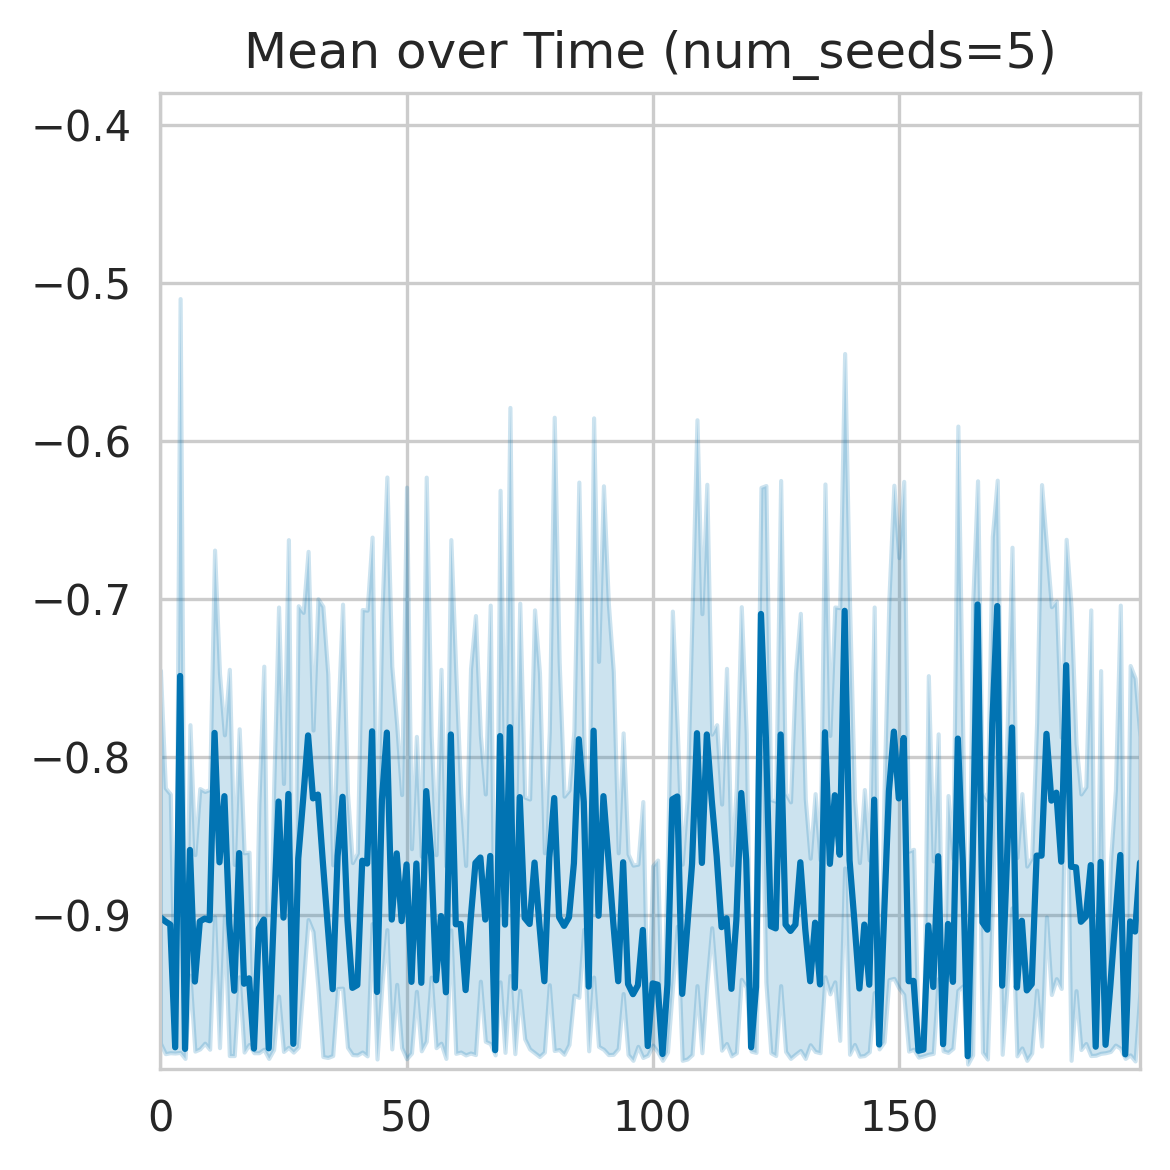

In [4]:
plot_performance_over_time(final_evaluation[["trial_number", "final_score", "seed"]],x="trial_number", y="final_score")

/home/lukas/Desktop/architectures-in-rl/plotting/plot_utils.py:281: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

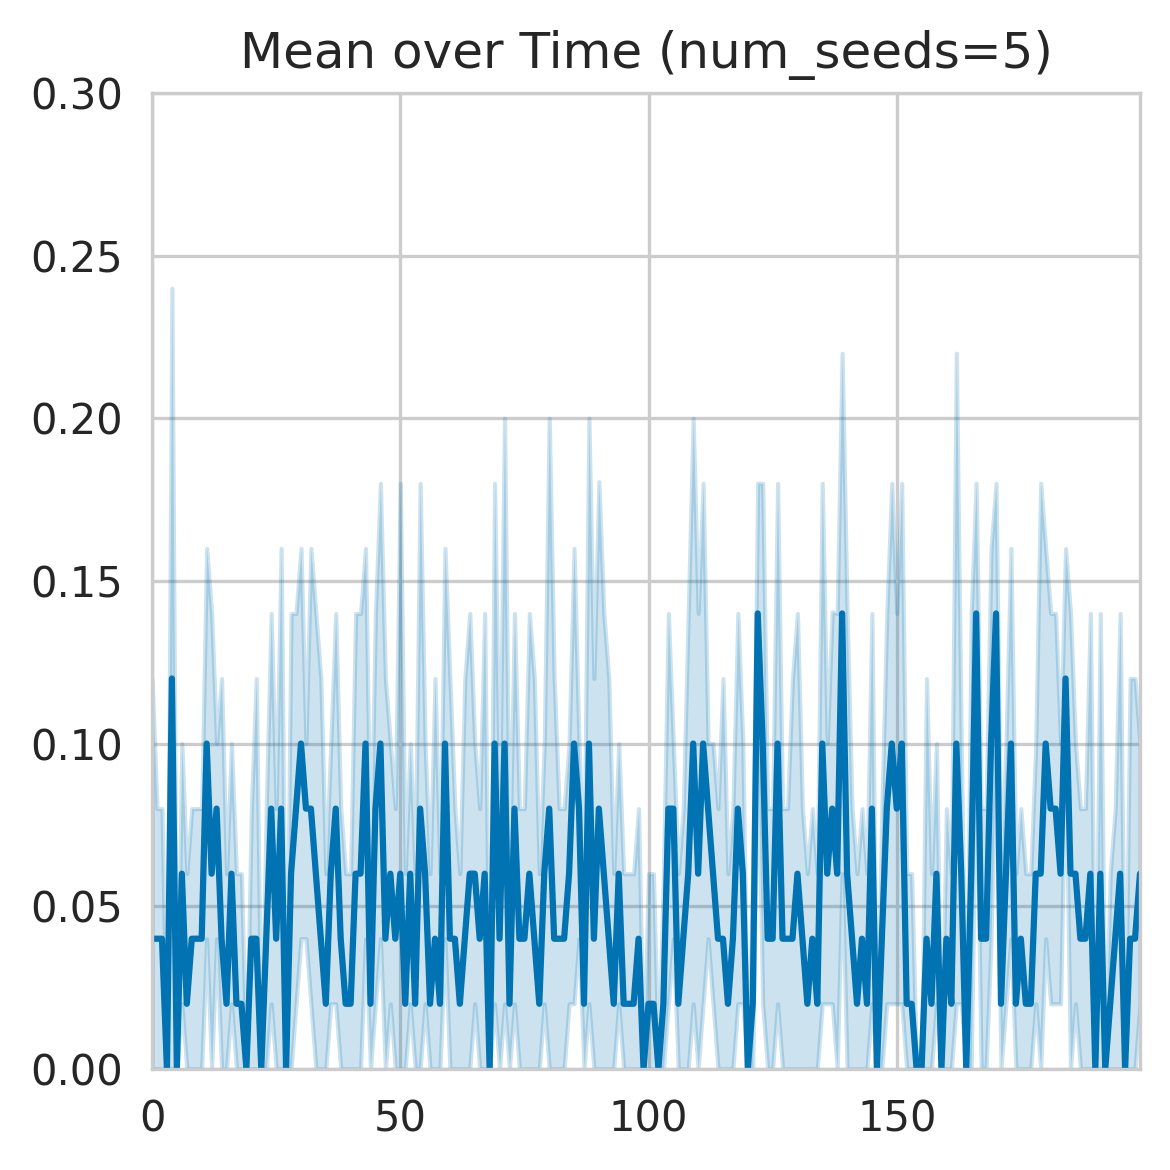

In [5]:
plot_performance_over_time(final_evaluation,x="trial_number", y="successfull")

## Plot Training Process

In [9]:
training_process = get_logtable(database_name="fehring_growing_nn", table_name="hpo_baseline_200_values", logtable_name="training_process", use_ssh_tunnel=False)
training_process["seed"] = training_process["worker_id"].astype(int)

2024-05-06 17:05:55,497  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-05-06 17:05:55,498  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-05-06 17:05:55,499  | py-experimenter - WARNING  | No values given for keyfield saved_neural_nets
2024-05-06 17:05:55,500  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-05-06 17:05:55,500  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-05-06 17:05:55,501  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-05-06 17:05:55,501  | py-experimenter - WARNING  | No values given for keyfield seed
2024-05-06 17:05:55,501  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-05-06 17:05:55,502  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-05-06 17:05:55,502  | py-experimenter - WARNING  | No values given for keyfield total_ti

In [10]:
training_process.head()

,ID,experiment_id,timestamp,worker_id,trial_number,timestep,evaluated_cost,evaluated_stdev,seed
0,1,1,2024-05-03 16:52:35,4,0,25000,-0.791,0.597117,4
1,2,1,2024-05-03 16:52:35,4,0,50000,-0.977,0.014866,4
2,3,1,2024-05-03 16:52:35,4,0,75000,-0.989,0.011358,4
3,4,1,2024-05-03 16:52:35,4,0,100000,-0.587,0.793600,4
4,5,1,2024-05-03 16:52:35,4,0,125000,-0.781,0.593758,4


In [11]:
training_process = training_process[training_process["experiment_id"] == 1]

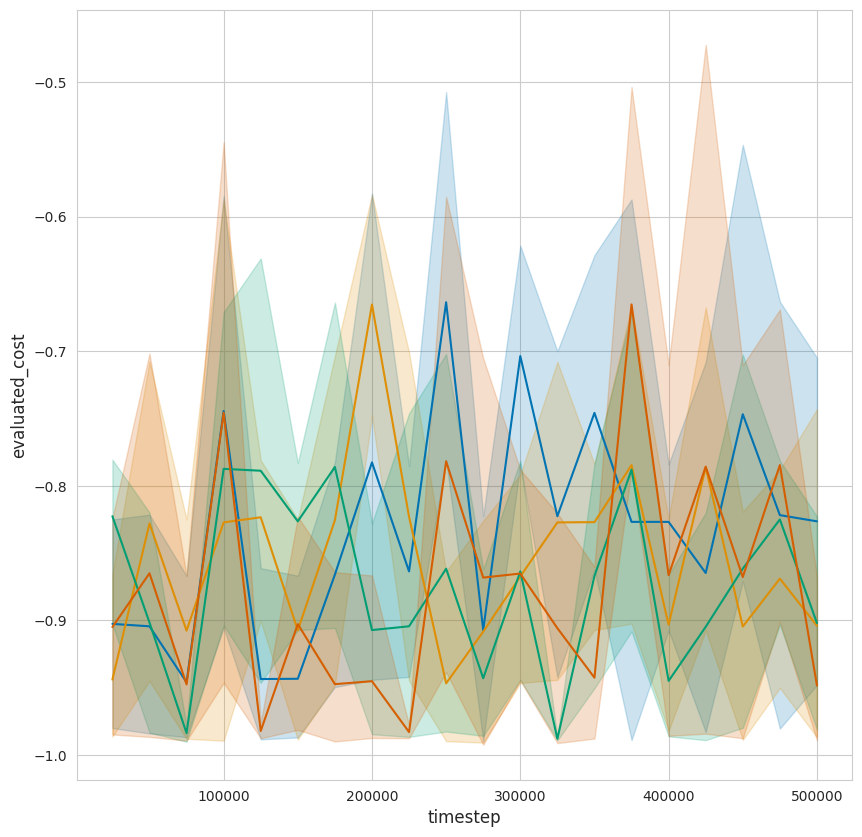

In [17]:
fig = plt.figure(figsize=(10, 10))
for trial_number in range(0, 200, 50):
    sns.lineplot(data=training_process[training_process["trial_number"] == trial_number], x="timestep", y="evaluated_cost")
plt.show()